## Google Colab Stuff

In [0]:
# Code to read csv file into colaboratory:# Code  
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#2. Get the file
downloaded = drive.CreateFile({'id':'10Xf2Xv_pfnIycH2HpNZR3SwWHiHdrqzX'}) # replace the id with id of file you want to access
downloaded.GetContentFile('handwritten.csv')  

#3. Read file as panda dataframe
import pandas as pd
data = pd.read_csv('handwritten.csv')

In [0]:
!pip install -q keras
!pip install -q numpy
!pip install -q sklearn
!pip install -q matplotlib
!pip install -q pandas

# [Batchnorm --> Relu --> Conv] Model Architecture

Goal of this notebook is to develop a neural network based off of the [batchnorm, relu, conv]xN ==> [affine]xM ==> [softmax or SVM]. Goal of the classifier developed by this model is to classify over 90% of the test data correctly.


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from sklearn.model_selection import train_test_split

## Load the Data

In [5]:
# Get the data from the csv file
# data = pd.read_csv("./data/handwritten_data_785.csv", encoding = "utf8").values
data = data.values
np.random.shuffle(data)

# Split the data into X, Y, and parition the values into the training and test splits
# Reshape X to be in the shape (N, 28, 28)
X, Y = data[:,1:], data[:,0]
# X = X.reshape(X.shape[0], 28, 28)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

print("Train {} {}".format(X_train.shape, Y_train.shape))
print("Test {} {}".format(X_test.shape, Y_test.shape))

Train (297629, 784) (297629,)
Test (74408, 784) (74408,)


## Analyze the Data

In [6]:
classes = np.unique(Y_train)
n_classes = len(classes)
print('Total number of outputs : ', n_classes)
print('Output classes : ', classes)

Total number of outputs :  26
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


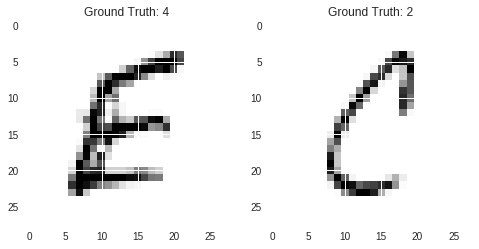

In [7]:
X_example1 = X_train[0]
X_example2 = X_test[0]

fig= plt.figure(figsize=(8,8))

X_example1_2d = X_example1.reshape(28,28)
fig.add_subplot(1,2,1)
plt.imshow(X_example1_2d)
plt.title("Ground Truth: {}".format(Y_train[0]))

X_example2_2d = X_example2.reshape(28,28)
fig.add_subplot(1,2,2)
plt.imshow(X_example2_2d)
plt.title("Ground Truth: {}".format(Y_test[0]))

plt.show()


## Data Preprocessing

In [8]:
from keras.utils import to_categorical

Using TensorFlow backend.


In [9]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
print("Train {}".format(X_train.shape))
print("Test {}".format(X_test.shape))

Train (297629, 28, 28, 1)
Test (74408, 28, 28, 1)


In [0]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

# Normalize and standardize the data
mean_image = np.mean(X_train, axis=0)
X_train = (X_train - mean_image) / 255
X_test = (X_test - mean_image) / 255

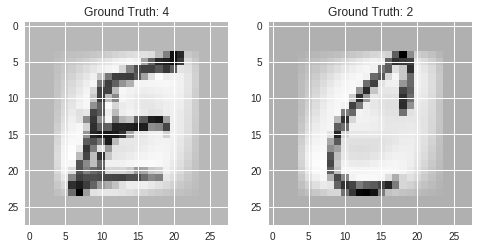

In [11]:
X_example1 = X_train[0]
X_example2 = X_test[0]

fig= plt.figure(figsize=(8,8))

X_example1_2d = X_example1.reshape(28,28)
fig.add_subplot(1,2,1)
plt.imshow(X_example1_2d)
plt.title("Ground Truth: {}".format(Y_train[0]))

X_example2_2d = X_example2.reshape(28,28)
fig.add_subplot(1,2,2)
plt.imshow(X_example2_2d)
plt.title("Ground Truth: {}".format(Y_test[0]))

plt.show()

In [12]:
Y_train_onehot = to_categorical(Y_train)
Y_test_onehot = to_categorical(Y_test)

print("Original Label: {}".format(Y_train[0]))
print("One Hot Label: {}".format(Y_train_onehot[0]))

Original Label: 4
One Hot Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [13]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train_onehot, test_size=0.2)

print("Train: {} {}".format(X_train.shape, Y_train.shape))
print("Valid: {} {}".format(X_valid.shape, Y_valid.shape))

Train: (238103, 28, 28, 1) (238103, 26)
Valid: (59526, 28, 28, 1) (59526, 26)


## [Batchnorm --> Relu --> Conv] Model

In [0]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers import Activation

In [0]:
batch_size = 128
epochs = 20
num_classes = 26

### Input
Accepts a 28 x 28 input layer.

### Architecture
Batchnorm Layer 1: 

Relu

Convolutional Layer 1:

Affine:

Softmax:

In [0]:
brc_model = Sequential()

brc_model.add(BatchNormalization(input_shape=(28, 28, 1)))
brc_model.add(Activation("relu"))
brc_model.add(Conv2D(32, kernel_size=(5,5), activation="relu", padding="same"))

brc_model.add(Flatten())

brc_model.add(Dense(num_classes, activation='softmax'))

In [18]:
brc_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
brc_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 26)                652314    
Total params: 653,150
Trainable params: 653,148
Non-trainable params: 2
_________________________________________________________________


In [19]:
brc_model_train = brc_model.fit(X_train, Y_train, batch_size=batch_size,
                                epochs=epochs,verbose=1,validation_data=(X_valid, Y_valid))

Train on 238103 samples, validate on 59526 samples
Epoch 1/20
238103/238103 [==============================] - 27s 114us/step - loss: 0.1989 - acc: 0.9469 - val_loss: 0.1074 - val_acc: 0.9722
Epoch 2/20
 82048/238103 [=========>....................] - ETA: 14s - loss: 0.0858 - acc: 0.9769

238103/238103 [==============================] - 26s 107us/step - loss: 0.0836 - acc: 0.9776 - val_loss: 0.0914 - val_acc: 0.9768
Epoch 3/20
200448/238103 [========================>.....] - ETA: 3s - loss: 0.0557 - acc: 0.9848

238103/238103 [==============================] - 26s 107us/step - loss: 0.0554 - acc: 0.9850 - val_loss: 0.0897 - val_acc: 0.9782
Epoch 4/20
238103/238103 [==============================] - 26s 108us/step - loss: 0.0385 - acc: 0.9895 - val_loss: 0.0826 - val_acc: 0.9812
Epoch 5/20
  1280/238103 [..............................] - ETA: 26s - loss: 0.0158 - acc: 0.9953

238103/238103 [==============================] - 26s 108us/step - loss: 0.0279 - acc: 0.9923 - val_loss: 0.0853 - val_acc: 0.9805
Epoch 6/20
167936/238103 [====================>.........] - ETA: 6s - loss: 0.0213 - acc: 0.9943

238103/238103 [==============================] - 26s 107us/step - loss: 0.0215 - acc: 0.9942 - val_loss: 0.0879 - val_acc: 0.9836
Epoch 7/20
230272/238103 [============================>.] - ETA: 0s - loss: 0.0179 - acc: 0.9954

238103/238103 [==============================] - 26s 108us/step - loss: 0.0183 - acc: 0.9952 - val_loss: 0.0939 - val_acc: 0.9821
Epoch 8/20
238103/238103 [==============================] - 25s 107us/step - loss: 0.0156 - acc: 0.9960 - val_loss: 0.0974 - val_acc: 0.9834
Epoch 9/20
 12032/238103 [>.............................] - ETA: 21s - loss: 0.0138 - acc: 0.9976

238103/238103 [==============================] - 26s 108us/step - loss: 0.0139 - acc: 0.9965 - val_loss: 0.1046 - val_acc: 0.9827
Epoch 10/20
173440/238103 [====================>.........] - ETA: 6s - loss: 0.0109 - acc: 0.9975

238103/238103 [==============================] - 26s 108us/step - loss: 0.0118 - acc: 0.9972 - val_loss: 0.0988 - val_acc: 0.9846
Epoch 11/20
234240/238103 [============================>.] - ETA: 0s - loss: 0.0119 - acc: 0.9972

238103/238103 [==============================] - 26s 107us/step - loss: 0.0120 - acc: 0.9972 - val_loss: 0.1052 - val_acc: 0.9840
Epoch 12/20
238103/238103 [==============================] - 26s 108us/step - loss: 0.0105 - acc: 0.9976 - val_loss: 0.1082 - val_acc: 0.9846
Epoch 13/20
 10240/238103 [>.............................] - ETA: 22s - loss: 0.0097 - acc: 0.9986

238103/238103 [==============================] - 26s 108us/step - loss: 0.0107 - acc: 0.9975 - val_loss: 0.1123 - val_acc: 0.9842
Epoch 14/20
172160/238103 [====================>.........] - ETA: 6s - loss: 0.0094 - acc: 0.9980

238103/238103 [==============================] - 26s 107us/step - loss: 0.0097 - acc: 0.9979 - val_loss: 0.1086 - val_acc: 0.9841
Epoch 15/20
229120/238103 [===========================>..] - ETA: 0s - loss: 0.0089 - acc: 0.9981

238103/238103 [==============================] - 26s 109us/step - loss: 0.0092 - acc: 0.9981 - val_loss: 0.1068 - val_acc: 0.9849
Epoch 16/20
238103/238103 [==============================] - 26s 108us/step - loss: 0.0089 - acc: 0.9984 - val_loss: 0.1147 - val_acc: 0.9847
Epoch 17/20
  6784/238103 [..............................] - ETA: 22s - loss: 0.0134 - acc: 0.9988

238103/238103 [==============================] - 26s 108us/step - loss: 0.0090 - acc: 0.9981 - val_loss: 0.1154 - val_acc: 0.9848
Epoch 18/20
173184/238103 [====================>.........] - ETA: 6s - loss: 0.0082 - acc: 0.9986

238103/238103 [==============================] - 26s 108us/step - loss: 0.0082 - acc: 0.9985 - val_loss: 0.1153 - val_acc: 0.9852
Epoch 19/20
235136/238103 [============================>.] - ETA: 0s - loss: 0.0073 - acc: 0.9989

238103/238103 [==============================] - 25s 107us/step - loss: 0.0072 - acc: 0.9989 - val_loss: 0.1167 - val_acc: 0.9850
Epoch 20/20
238103/238103 [==============================] - 26s 107us/step - loss: 0.0084 - acc: 0.9983 - val_loss: 0.1232 - val_acc: 0.9850


In [20]:
test_eval = brc_model.evaluate(X_test, Y_test_onehot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.11552578362394206
Test accuracy: 0.9854182345984303


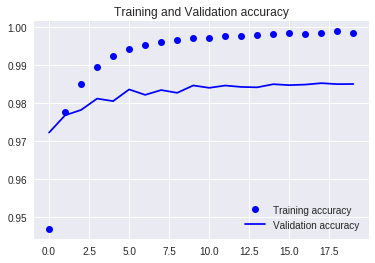

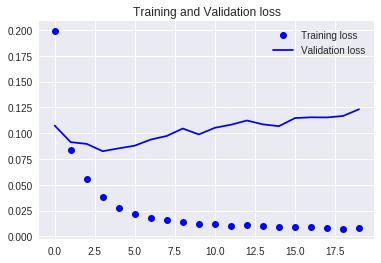

In [21]:
accuracy = brc_model_train.history['acc']
val_accuracy = brc_model_train.history['val_acc']
loss = brc_model_train.history['loss']
val_loss = brc_model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()